## Descripció

Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.

## Nivell 1

**- Exercici 1:**
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.metrics import geometric_mean_score

%matplotlib inline   

Baixem la base de dades i la netegem de la mateixa manera que el exercici anterior:

In [31]:
flights2008_df=pd.read_csv('C:\\Users\\march\\000 Treball Ju'yter 000\\Sprints_IT Academy_Data Science\\Sprint_9\\DelayedFlights.csv', )

In [32]:
flights2008_df.drop(['Year'],axis=1,inplace=True) #eliminem l'any perquè tots els vols són del mateix any!!
flights2008_df['TailNum'].fillna(value='Unknown',inplace=True) #canviem vols sens número de cua per unknown

In [33]:
flights2008_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [34]:
flights2008_df.ArrDelay=flights2008_df.ArrDelay.map(lambda x: 0 if x<=0 else 1)
flights2008_df.groupby('ArrDelay').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelay,,,,,,,,,,,,,,,,,,,,,
0,204956,204956,204956,204956,204956,204956,204956,204956,204956,204956,...,204956,204956,204956,204956,204956,0,0,0,0,0
1,1731802,1731802,1731802,1731802,1731802,1724692,1731802,1731802,1731802,1731802,...,1724692,1731347,1731802,1731802,1731802,1247488,1247488,1247488,1247488,1247488


In [35]:
flights2008_df.ArrDelay.value_counts(normalize=True)

1    0.894176
0    0.105824
Name: ArrDelay, dtype: float64

In [36]:
flights2008_df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Per les que el retras és nul, posem a 0 els retrassos diferents on no constava cap valor:

In [37]:

for i in ['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']:
    flights2008_df.loc[(flights2008_df.ArrDelay==0)&(flights2008_df[i].isnull()),i ]=0

flights2008_df.loc[(flights2008_df.ArrDelay==0)&(flights2008_df['ArrTime'].isnull()),'ArrTime']=flights2008_df.CRSArrTime

flights2008_df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         484314
WeatherDelay         484314
NASDelay             484314
SecurityDelay        484314
LateAircraftDelay    484314
dtype: int64

In [38]:
for i in [ 'ArrTime','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut',
       'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']:
       buit= flights2008_df[(flights2008_df.ArrDelay==0)&(flights2008_df[i].isnull())].count().Month
       print (f'{i} té {buit} instancies buides (nan) on no hi hagi retras.')

ArrTime té 0 instancies buides (nan) on no hi hagi retras.
ActualElapsedTime té 0 instancies buides (nan) on no hi hagi retras.
CRSElapsedTime té 0 instancies buides (nan) on no hi hagi retras.
AirTime té 0 instancies buides (nan) on no hi hagi retras.
TaxiIn té 0 instancies buides (nan) on no hi hagi retras.
TaxiOut té 0 instancies buides (nan) on no hi hagi retras.
CarrierDelay té 0 instancies buides (nan) on no hi hagi retras.
WeatherDelay té 0 instancies buides (nan) on no hi hagi retras.
NASDelay té 0 instancies buides (nan) on no hi hagi retras.
SecurityDelay té 0 instancies buides (nan) on no hi hagi retras.
LateAircraftDelay té 0 instancies buides (nan) on no hi hagi retras.


In [39]:
#Com que no hi han dates de vols no retrassat, es procedeix a eliminar els valors nuls:
index=list(flights2008_df[flights2008_df['LateAircraftDelay'].isnull()].index)#index de vols que tenen distancia nul
flights2008_df.drop(index=index, inplace=True)
flights2008_df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Al netejar el dataframe no queden vols cancelats. Es poden borrar totes les columnes referents a la cancelació i desviació de vols.

In [40]:
flights2008_df.ArrDelay.value_counts(normalize=True) 

1    0.858889
0    0.141111
Name: ArrDelay, dtype: float64

Inicialment només treballarem amb les columnes numèriques, així que procedim a agafar data frame on només estiguin aquestes (df_small):

In [42]:
# Eliminem les dades no numèriques del Dataframe:
df_small=flights2008_df.sample(n=50000,random_state=42)
objectiu=list(df_small.ArrDelay)     
df_small.drop('ArrDelay', axis=1, inplace=True)
categor_index=df_small.dtypes[df_small.dtypes!='object'].index
df_small=df_small[categor_index]
df_small.head()[:2]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
515702,3,12,3,1911.0,1847,2236.0,2211,552,145.0,144.0,...,936,6.0,19.0,0,0,24.0,0.0,1.0,0.0,0.0
466285,3,17,1,1033.0,935,1152.0,1059,322,79.0,84.0,...,397,9.0,10.0,0,0,0.0,0.0,0.0,0.0,53.0


Hi ha molts més vols amb retard que sense 85.9% vs 14.1% del total), s'haurà de treballar amb 2 classes desbalancejades. Cal veure quin model podem fer servir, per tal d'avaluar el model també és molt important determinar quin és el paràmetre que ens permet comparar entre mètodes. A la bibliografia trobem que per a un problema de classificació entre classes, on li donem donem igual valor a les dues i la classe majoritària representa >80% del total de valors, el paràmetre a seguir seria la G-Mean.

## Funcions generiques


In [41]:
def check_classification_method(method_classifier,features,label, random): #si random=0 serà aletori!
    if random==0:
        random_state=None
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=random)
    method=method_classifier
    method.fit(X_train, list(y_train))
    prediction= method.predict(X_test)
    return  prediction,y_test

# Retorna una lista con metrica de classificacion accuracy, matrix confusion, G-Mean, f1 score + informe 
# Generem DataFrame per a contenir després els resultats.

metrics_df = pd.DataFrame(columns = ['Model', 'Accuracy' , 'Confusion Matrix', 'G-Mean'])

def check_prediction(prediction,real):
    list=[]
    accuracy=accuracy_score(real,prediction)
    confusion=confusion_matrix(real, prediction)
    gmean_score=round(geometric_mean_score(real, prediction,average = 'binary'),3)
    f1=f1_score(real, prediction, average='binary', sample_weight=None, zero_division='warn')
    list_metrics=[accuracy, confusion,gmean_score,f1]
    report= classification_report(real, prediction)
    return list_metrics, report

### Provem models

In [81]:
metrics_df.drop(metrics_df.index,inplace=True)

In [82]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    ]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    ]

j=0
resultats_llista=[]


for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df= metrics_df.append(nou_registre,ignore_index=True)
    print('')
    j+=1



* * * * *  Nearest Neighbors  * * * * *
Accuracy 0.8582
confusion matrix [[ 443  990]
 [ 428 8139]]
G-Mean: 0.542

* * * * *  Linear SVM  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  Decision Tree  * * * * *
Accuracy 0.9904
confusion matrix [[1349   84]
 [  12 8555]]
G-Mean: 0.97

* * * * *  Random Forest  * * * * *
Accuracy 0.8614
confusion matrix [[  47 1386]
 [   0 8567]]
G-Mean: 0.181

* * * * *  Neural Net  * * * * *
Accuracy 0.9964
confusion matrix [[1430    3]
 [  33 8534]]
G-Mean: 0.997



In [83]:
names = [
    "AdaBoost",
    "QDA",
]
classifiers = [
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()
    ]

j=0
resultats_llista=[]

for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df= metrics_df.append(nou_registre,ignore_index=True)
    print()
    j+=1


* * * * *  AdaBoost  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  QDA  * * * * *
Accuracy 0.1433
confusion matrix [[1433    0]
 [8567    0]]
G-Mean: 0.0



C:\Users\march\anaconda3\envs\machineLearning37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\march\anaconda3\envs\machineLearning37\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\march\anaconda3\envs\machineLearning37\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\march\anaconda3\envs\machineLearning37\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\march\anaconda3\envs\machineLearning37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

In [84]:
names = [
    "Gradient Boosting",
    "Naive Bayes"
]
classifiers = [
    GradientBoostingClassifier(),
    GaussianNB()
    ]

j=0
resultats_llista=[]

for i in classifiers:
    prediction, real = check_classification_method(i,df_small,objectiu,0)
    resultats_llista.append([names[j], prediction, real])
    metric_list, inform  = check_prediction (prediction, real)
    print ('* '*5,names[j],' *'*5)
    print(f'Accuracy {metric_list[0]}')
    print('confusion matrix', metric_list[1])
    print('G-Mean:', metric_list[2])
    nou_registre={'Model':names[j], 'Accuracy':metric_list[0] , 
                'Confusion Matrix':metric_list[1], 
                'G-Mean':metric_list[2]}
    metrics_df= metrics_df.append(nou_registre,ignore_index=True)
    print()
    j+=1



* * * * *  Gradient Boosting  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0

* * * * *  Naive Bayes  * * * * *
Accuracy 1.0
confusion matrix [[1433    0]
 [   0 8567]]
G-Mean: 1.0



()

L'accuracy ha de ser >0.86 per a millorar la proporció real de la classe majoritària. S'observa que hi ha 2 casos:
  1. Els mètode donen una precissó que és anàlogo a la proporció de la classe majoritària. Indica que la classificació no és bona per a la classe minòritaria.
  2. Els mètodes donen una precissió i exactitud màxima perquè han trobat els parametres que correlacionen directaent amb el retard.

Fonts d'informació per a la selecció del model:
https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

Evaluació de model de classificació per a classes imbalancejades:
http://glemaitre.github.io/imbalanced-learn/generated/imblearn.metrics.geometric_mean_score.html

https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/


![imagen](https://machinelearningmastery.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png)

**- Exercici 2:**
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

El càlcul s'ha fet durant l'exercici 1, els resultats estan resumits en el dataframe metrics_df on he inclòs la G-Mean que seria la mètrica més adequada per a valorar el cas que tenim (classe majoritaria >80%població, les classes són igual d'importants):

In [85]:
metrics_df

,Model,Accuracy,Confusion Matrix,G-Mean
0,Nearest Neighbors,0.8582,"[[443, 990], [428, 8139]]",0.542
1,Linear SVM,1.0000,"[[1433, 0], [0, 8567]]",1.000
2,Decision Tree,0.9904,"[[1349, 84], [12, 8555]]",0.970
3,Random Forest,0.8614,"[[47, 1386], [0, 8567]]",0.181
4,Neural Net,0.9964,"[[1430, 3], [33, 8534]]",0.997
5,AdaBoost,1.0000,"[[1433, 0], [0, 8567]]",1.000
6,QDA,0.1433,"[[1433, 0], [8567, 0]]",0.000
7,Gradient Boosting,1.0000,"[[1433, 0], [0, 8567]]",1.000
8,Naive Bayes,1.0000,"[[1433, 0], [0, 8567]]",1.000


 **- Exercici 3:** Entrena’ls utilitzant els diferents paràmetres que admeten.


Procedeixo a optimitzar dues metodologies que han donat més baixes: la de Nearest Neighbors i la de Random Forest:

### Optimització K-Nearest Neighbours

In [143]:
## Optimització del K Neighbours Classifier
knn_optim_df = pd.DataFrame(columns = ['n-neighbours', 'Weights' , 'Confusion Matrix','Accuracy', 'G-Mean'])
j=0
for weights_mode in ['uniform', 'distance']:
    for i in [1,3,5,7,9,11]:
        prediction, real = check_classification_method(KNeighborsClassifier(n_neighbors=i, 
                            weights=weights_mode),df_small,objectiu,0)
        metric_list, inform  = check_prediction (prediction, real)
        print ('* '*3,f' K Neighbours classifier n={i} and mode={weights_mode}.',' *'*3)
        print(f'Accuracy {metric_list[0]}')
        print('G-Mean:', metric_list[2])
        nou_registre={'n-neighbours':i, 
                    'Weights':weights_mode, 
                    'Confusion Matrix': metric_list[1],
                    'Accuracy':metric_list[0] , 
                    'G-Mean':metric_list[2]}                    
        knn_optim_df= knn_optim_df.append(nou_registre,ignore_index=True)
        print('')
        j+=1
knn_optim_df


* * *   K Neighbours classifier n=1 and mode=uniform.  * * *
Accuracy 0.8519
G-Mean: 0.63

* * *   K Neighbours classifier n=3 and mode=uniform.  * * *
Accuracy 0.8582
G-Mean: 0.542

* * *   K Neighbours classifier n=5 and mode=uniform.  * * *
Accuracy 0.8595
G-Mean: 0.454

* * *   K Neighbours classifier n=7 and mode=uniform.  * * *
Accuracy 0.8633
G-Mean: 0.405

* * *   K Neighbours classifier n=9 and mode=uniform.  * * *
Accuracy 0.8628
G-Mean: 0.357

* * *   K Neighbours classifier n=11 and mode=uniform.  * * *
Accuracy 0.8619
G-Mean: 0.312

* * *   K Neighbours classifier n=1 and mode=distance.  * * *
Accuracy 0.8519
G-Mean: 0.63

* * *   K Neighbours classifier n=3 and mode=distance.  * * *
Accuracy 0.8642
G-Mean: 0.583

* * *   K Neighbours classifier n=5 and mode=distance.  * * *
Accuracy 0.8677
G-Mean: 0.533

* * *   K Neighbours classifier n=7 and mode=distance.  * * *
Accuracy 0.8723
G-Mean: 0.502

* * *   K Neighbours classifier n=9 and mode=distance.  * * *
Accuracy 0.8717

,n-neighbours,Weights,Confusion Matrix,Accuracy,G-Mean
0,1,uniform,"[[617, 816], [665, 7902]]",0.8519,0.630
1,3,uniform,"[[443, 990], [428, 8139]]",0.8582,0.542
2,5,uniform,"[[305, 1128], [277, 8290]]",0.8595,0.454
3,7,uniform,"[[240, 1193], [174, 8393]]",0.8633,0.405
4,9,uniform,"[[185, 1248], [124, 8443]]",0.8628,0.357
5,11,uniform,"[[141, 1292], [89, 8478]]",0.8619,0.312
6,1,distance,"[[617, 816], [665, 7902]]",0.8519,0.630
7,3,distance,"[[513, 920], [438, 8129]]",0.8642,0.583
8,5,distance,"[[423, 1010], [313, 8254]]",0.8677,0.533
9,7,distance,"[[371, 1062], [215, 8352]]",0.8723,0.502


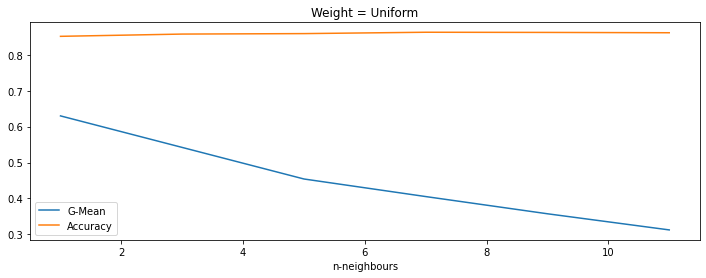

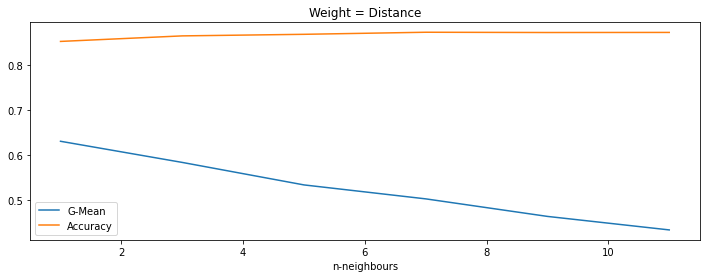

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
knn_optim_df[knn_optim_df.Weights=='uniform'].plot(x='n-neighbours', y=['G-Mean','Accuracy'],ax=axs)
axs.set_title('Weight = Uniform')
fig2, axs2 = plt.subplots(figsize=(12, 4))
knn_optim_df[knn_optim_df.Weights=='distance'].plot(x='n-neighbours',y=['G-Mean','Accuracy'], ax=axs2)
axs2.set_title('Weight = Distance')
plt.show()



COm era lògic, la classe minoritaria es veu beneficiada quan menys n-neighbours s'agafin (haurien de ser 1 o 3), la millor modalitat dels pesos es en referència a la distàncis (wheights=distance).

### Optimització del Random Forest Classifier


In [139]:
rf_optim_df = pd.DataFrame(columns = ['n-estimator', 'max_depth' , 'Confusion Matrix','Accuracy', 'G-Mean'])
rf_optim_df.drop(index=rf_optim_df.index, inplace=True)
max_depth_list=[5,10,15,20,25]
n_estimator_list=[20, 50, 300, 750]
j=0
for n_estimator in n_estimator_list:
    for max_depth  in max_depth_list:
        prediction, real = check_classification_method(RandomForestClassifier(random_state = 1, 
                                    n_estimators = n_estimator, max_depth=max_depth),df_small,objectiu,0)
        metric_list, inform  = check_prediction (prediction, real)
        print ('* '*3,f' Random Forest classifier # Estimators={n_estimator} and max_depth={max_depth}.',' *'*3)
        print(f'Accuracy {metric_list[0]}')
        print('G-Mean:', metric_list[2])
        nou_registre={'n-estimator':n_estimator, 
                    'max_depth':max_depth, 
                    'Confusion Matrix': metric_list[1],
                    'Accuracy':metric_list[0] , 
                    'G-Mean':metric_list[2]}                    
        rf_optim_df= rf_optim_df.append(nou_registre,ignore_index=True)
        print('')
        j+=1


* * *   Random Forest classifier # Estimators=20 and max_depth=5.  * * *
Accuracy 0.9888
G-Mean: 0.96

* * *   Random Forest classifier # Estimators=20 and max_depth=10.  * * *
Accuracy 0.9987
G-Mean: 0.996

* * *   Random Forest classifier # Estimators=20 and max_depth=15.  * * *
Accuracy 0.9985
G-Mean: 0.997

* * *   Random Forest classifier # Estimators=20 and max_depth=20.  * * *
Accuracy 0.9991
G-Mean: 0.998

* * *   Random Forest classifier # Estimators=20 and max_depth=25.  * * *
Accuracy 0.999
G-Mean: 0.998

* * *   Random Forest classifier # Estimators=50 and max_depth=5.  * * *
Accuracy 0.9883
G-Mean: 0.959

* * *   Random Forest classifier # Estimators=50 and max_depth=10.  * * *
Accuracy 0.9987
G-Mean: 0.996

* * *   Random Forest classifier # Estimators=50 and max_depth=15.  * * *
Accuracy 0.9992
G-Mean: 0.999

* * *   Random Forest classifier # Estimators=50 and max_depth=20.  * * *
Accuracy 0.999
G-Mean: 0.998

* * *   Random Forest classifier # Estimators=50 and max_dep

In [140]:
rf_optim_df

,n-estimator,max_depth,Confusion Matrix,Accuracy,G-Mean
0,20,5,"[[1322, 111], [1, 8566]]",0.9888,0.960
1,20,10,"[[1423, 10], [3, 8564]]",0.9987,0.996
2,20,15,"[[1426, 7], [8, 8559]]",0.9985,0.997
3,20,20,"[[1429, 4], [5, 8562]]",0.9991,0.998
4,20,25,"[[1428, 5], [5, 8562]]",0.9990,0.998
5,50,5,"[[1317, 116], [1, 8566]]",0.9883,0.959
6,50,10,"[[1423, 10], [3, 8564]]",0.9987,0.996
7,50,15,"[[1430, 3], [5, 8562]]",0.9992,0.999
8,50,20,"[[1428, 5], [5, 8562]]",0.9990,0.998
9,50,25,"[[1430, 3], [5, 8562]]",0.9992,0.999


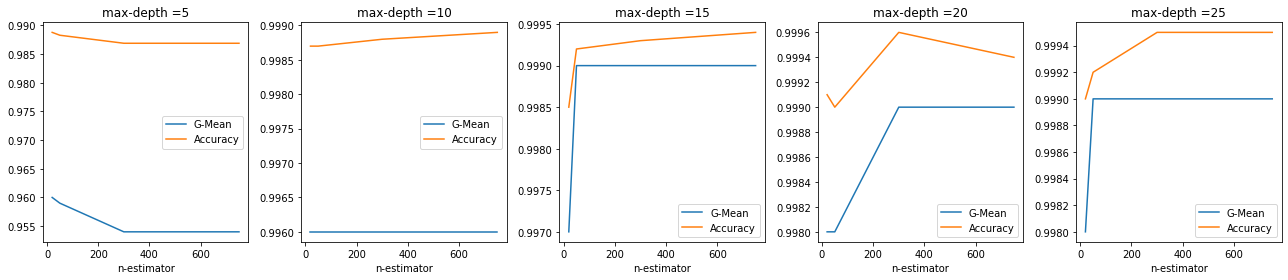

In [141]:
fig, axs = plt.subplots(figsize=(18, 4),ncols=5)
j=0
for i in max_depth_list:
    rf_optim_df[rf_optim_df.max_depth==i].plot(x='n-estimator', y=['G-Mean','Accuracy'],ax=axs[j])
    axs[j].set_title(f'max-depth ={i}')
    fig.tight_layout()
    j+=1
    
plt.show()



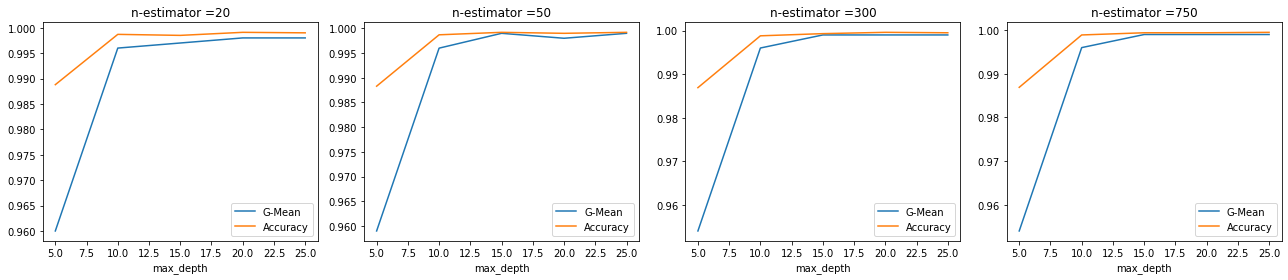

In [142]:
fig2, axs2 = plt.subplots(figsize=(18, 4),ncols=4)
j=0
for i in n_estimator_list:
    rf_optim_df[rf_optim_df['n-estimator']==i].plot(x='max_depth', y=['G-Mean','Accuracy'],ax=axs2[j])
    axs2[j].set_title(f'n-estimator ={i}')
    fig2.tight_layout()
    j+=1
    
plt.show()



Es pot concloure que els paràmetres obtims per al random Forest serien un n-estimator= 300 amb una max_depth=20. El canvi ha estat molt gran respecte la dada inicial que partia d'un n_estimator molt baix.


**- Exercici 4:** Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.



## Nivell 2

**- Exercici 5:** Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


## Nivell 3

**- Exercici 6:** No utilitzis la variable DepDelay a l’hora de fer prediccions
